Libraries and Style Files
-------------------------
In this section, we load external libraries and define the plotting style used for the figures below.

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

Single-Scatter Recoil Spectrum
===============================

Definition of Terms
-

- $E_r$: electrion recoil energy.
- $d\sigma$: differential cross section.
- $d\Omega$: differential solid angle, an infinitessimally small slice of the 3-dimensional angle space.
- $\frac{d\sigma}{d\Omega}$: differential cross section with respect to solid angle $\Omega$, which tells us how likely is it for a scattered particle (the neutron or the electron, depending on frame) to scatter at a specific angle. In the CoM frame, this value is constant, so all scattering angles are equally likely.
- $\frac{d\sigma}{dE_r}$: differential cross section with respect to electrion recoil energy $E_r$, or recoil spectrum, which tells us the probability density of finding a recoil electron with a specific energy $E_r$ after many such scattering events.
- $\gamma_n$: neutron gyromagnetic ratio, which relates the magnetic moment of a particle to its spin angular momentum.
- $\mu_B$: Bohr magneton.
- $m_n$: mass of the neutron.
- $m_e$: mass of the electron.

Differential Cross Section Derivation
-
In the paper we have computed the differential cross section with respect to solid angle $\Omega$ for a neutron magnetically scattering off of a single electron. That expression, in the center-of-mass frame (CoM), is as follows:

\begin{equation}
\left ( \frac{d\sigma}{d\Omega} \right )_{CM}= \frac{2m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2}.
\end{equation}

The differential cross section $(\frac{d\sigma}{d\Omega})_{CM}$ is constant, meaning that in the CoM frame, the neutron scatters equally at all angles after collision. This is referred to as isotropic scattering. Sicne the electron's scattering energy $E_r$ is a function of the scattering angle, said electron is equally likely to scatter at any energy in its recoil spectrum (from $0$ to $E_n^{max}$).

Our research focuses on recoil energy, not scattering angle. Thus, we must map the scattering angle to recoil energy. The cross section above is easily converted into the single-scatter recoil cross section for monoenergetic neutrons by the same methods as the notebook `0-Preliminaries/B-Neutron-Nucleus-Recoil-Distributions.ipynb`.

\begin{equation}
\begin{aligned}
\frac{d\sigma}{dE_r} &= \int d\phi_{cm} \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right)\\
&=2\pi \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right),
\end{aligned}
\end{equation}

This results in the following differential cross section:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{2\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{(m_n+m_e)^2}{m_n m_e E_n}.
\end{equation}

This can also be written in terms of the maximum recoil for a given neutron energy $E_n$. That results in:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{8\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{1}{E_{\mathrm{max}}(E_n)}.
\end{equation}

Compute the Cross Section
-------------------------
We now implement the analytical expression for the single-scatter (meaning the incident neutron only interacts with one electron and then nothing else) differential cross section:

$\frac{d\sigma}{dE_r}$ = constant

This result holds for monoenergetic neutrons and arises because the angular distribution in the CoM frame is isotropic. As a result, the electron's recoil energy spectrum is flat from $0$ to $E_{max}$, and zero beyond that. For clarification, the electron's recoil energy itself is not constant—rather, it is the probability distribution of recoil energies that is flat.

In the next cell, we begin by defining the neutron and electron masses in units of keV. 

In [2]:
import scipy.constants as co

# Physical constants: neutron and electron rest mass energies in keV
m_n = co.physical_constants['neutron mass energy equivalent in MeV'][0]*1e3 # Neutron mass (keV)
m_e = co.physical_constants['electron mass energy equivalent in MeV'][0]*1e3 # Electron mass (keV)

print("Neutron Mass: {} keV".format(m_n))
print("Electron Mass: {} keV".format(m_e))

Neutron Mass: 939565.4205199999 keV
Electron Mass: 510.99895 keV


We will now compute $E_{max}$ and $E_{min}$ for electron recoil energy in the CoM frame.

$E_{max}$ corresponds to a head-on collision of 180° and describes the maximum electron recoil energy for a given neutron energy:
\begin{equation}
E_r^{max} = \frac{4m_em_n}{(m_e+m_n)^2}E_n
\end{equation}

$E_{min}$ corresponds to the minimum neutron energy needed to produce a recoil of size $E_r$ and is the inverse of the equation above:
\begin{equation}
E_n = \frac{(m_e+m_n)^2}{4m_em_n}E_r
\end{equation}

In [3]:
def Emax(En): #En in keV; Returns the maximum electron recoil energy (keV) for a neutron of energy En (keV)
    return (4*m_e*m_n*En)/(m_e+m_n)**2

def Enmin(Er): #recoil energy in keV; Returns the minimum neutron energy (keV) required to produce a recoil energy Er (keV)
    return (Er*(m_e+m_n)**2)/(4*m_e*m_n)

The following section converts our units into CGS (Centimeter, Gram, Second) units. This is done for uniform unit consistency before computing additional calculations.

In [4]:
#constants for calcs, first in SI units
gn = co.physical_constants['neutron gyromag. ratio'][0] #default is s^-1 T^-1; CGS is s^-1 Gauss^-1
mub = co.physical_constants['Bohr magneton'][0] #default is J T^-1
hbar = co.physical_constants['reduced Planck constant'][0] #default in J s

#convert to CGS
#see https://en.wikipedia.org/wiki/Centimetre%E2%80%93gram%E2%80%93second_system_of_units
m_n_CGS = co.physical_constants['neutron mass'][0]*1e3 #convert to grams
gn_CGS = gn/1e4
mub_CGS = mub*1e3
hbar_CGS = hbar*1e7

barnincm2 = 1e-24

print('Neutron mass: {} g'.format(m_n_CGS))
print('Neutron gyromagnetic ratio: {} s^-1 Gauss^-1 '.format(gn_CGS))
print('Bohr magneton: {} erg Gauss^-1 '.format(mub_CGS))
print('hbar: {} erg s '.format(hbar_CGS))


Neutron mass: 1.67492749804e-24 g
Neutron gyromagnetic ratio: 18324.7171 s^-1 Gauss^-1 
Bohr magneton: 9.2740100783e-21 erg Gauss^-1 
hbar: 1.054571817e-27 erg s 


Now we are ready to compute the total neutron-electron magnetic scattering cross section, $\sigma$, in barns:

\begin{equation}
\sigma = \frac{8\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2}
\end{equation}

In [5]:
sigtot = 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2
print('Total cross section: {} barns'.format(sigtot/barnincm2))

Total cross section: 1.8310038087245937 barns


Let's now calculate the differential cross-section with respect to the electron's recoil energy. We need to ensure that the function is properly bound, so that if $E_r$ is greater than $E_{max}$, the function will return a value of zero. In other words, the function will return the flat cross section between $0$ and $E_{max}$, and will return $0$ otherwise.

In [6]:
def dsigdEr(En,Er):
    if(Er<Emax(En)):
      return 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2/Emax(En)
    else: 
      return 0

Now we'll test our function above for two specific situations: one within our boundary and one outside of it. First, we will test what the specific differential cross section is for an electron recoil energy of 1 keV for a neutron with an energy of 1 MeV. For an incident neutron with an energy of 1 keV, our $E_r^{max}$ becomes:

\begin{equation}
E_r^{max} = \frac{4m_em_n}{(m_e+m_n)^2}E_n = \frac{4*(511 \text{ keV})*(939,565 \text{ keV})}{((511 \text{ keV})+(939,565 \text{ keV}))^2}1,000 \text{ keV} = 1.939 \text{ keV}
\end{equation}

Our recoil energy is within the maximum, so we should get a legitimate value (which we see below as 0.8425749477714446 barns/keV, which tells us the probability density for the electron to recoil with energy = 1 keV, when struck by a 1 MeV neutron.

Next, we will test what the specific differential cross section is for an electron recoil energy of 3 keV for a neutron with an energy of 1 MeV. Since 3 keV is greater than our maximum recoil energy, we should get a value of 0 (which we do), meaning there is no situation in which an election will recoil with an energy of 3 keV when struck by an incident neutron with an energy of 1 MeV.

In [7]:
print(dsigdEr(1000,1)/barnincm2) #1 MeV neutron at 1 keV recoil

0.8425749477714446


In [8]:
print(dsigdEr(1000,3)/barnincm2) #1 MeV neutron at 3 keV recoil

0.0


Integrating Against Flux Spectrum
---------------------------------

Up to now, we've assumed monoenergetic neutrons (e.g. 1 MeV). However, in real experiments, the incident neutron energies follow a distribution—some are low energy, some are high. Thus, we must account for the full energy spectrum of the neutron flux. After all, the electron's recoil energy $E_r$ depends on:
- The incident neutron's energy $E_n$
- The flux of neutrons at that energy $\phi(E_n)$ (the number of incoming neutrons per unit energy, area, and time)
- The cross section $\frac{d\sigma}{dE_r}$ at that energy.

To get the observed recoil spectrum, we have to take into account all of the incident neutron energies and their relative rates. To do this we can use the differential flux $\phi(E_n)$ from the function `SNOLAB_flux` in the library `flux_recoil_spec.py`. The expression that will give the recoil spectrum is as follows.

\begin{equation}
R = \frac{\eta N_A}{m} \int dE_n \phi(E_n)\frac{d\sigma}{dE_r}
\end{equation}

Where:
- $R$ is the rate of recoils in units of events/kg/day/keV.
- $\eta$ is the number of electrons that are available-to-scatter per atom.
- $N_A$ is Avogadro's number.
- $m$ is the molar mass of the detector material in g/mol.
- $\phi(E_n)$ is the neutron flux.
- $\frac{d\sigma}{dE_r}$ is the the differential cross section for a neutron of energy $E_n$ causing an electron recoil of $E_r$.

The following code loads the neutron flux spectrum collected from the SNOLAB detector environment. The `SNOLAB_flux` function pulls the energy and flux data. Specifically:
- `E` gives the neutron energies, $E_n$.
- `F` gives the differential neutron flux, $\phi(E_n)$
- `ff` and `ffspec` give different versions of the neutron flux which may be useful for plotting.
The data being pulled is sorted such that only neutrons with energies equal to or grater than 1 keV are loaded.

In [9]:
import flux_recoil_spec as frs
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.34198906017016933, intercept=-12.883178144228596, rvalue=-0.9953352356165472, pvalue=2.8473572672917526e-06, stderr=0.01482451947661301, intercept_stderr=0.06273875262265731)
0.009998654133395216 0.01


The diagnostic output above gives us insight into our detector environment. Specifically, `fast flux: 4000.0000000000005 n/m^2/day` tells us that on average, 4,000 neutrons with "fast" energy (usually above ~1 MeV) are passing through each square meter of detector surface per day. `shape of etot: (6000,)` tells us that the energy array `etot` has 6000 elements. `LinregressResult(...)` gives a linear regression fit of the data.

The next section of code below first reloads the `flux_recoil_spec.py` module. It then prints three data points:
- 1: The maximum electron recoil energy (in keV) possible from an incident neutron with an energy of 1000 keV (from $E_r^{max}$ above).
- 2: The minimum incident neutron energy (in keV) needed to cause the electron recoil energy from 1 above (from $E_n$ above) (this is effectively a sanity check on the encoded math).
- 3: The differential cross section $\frac{d\sigma}{dE_r}$ for a 1,000 keV neutron causing a 1 keV electron recoil in barns/keV.

These data points are checked so that we can ensure our encoded math and data is correct before applying it to the entire data set.

In [10]:
import importlib
importlib.reload(frs)

print(frs.Emax(1000))
print(frs.Enmin(2.1731049))
print(frs.dsigdErNE(1000,1)/barnincm2)

2.1731049725220037
999.9999666274732
0.8425749477714446


The following code produces an array that tells us the differential cross section of a 1,000 keV incident neutron given an electron recoil energy $E_r$. It then prints the data points for recoil energies of 1 keV and 2 keV, both of which are under our previously calculated $E_r^{max}$ of 2.1731049725220037 keV. The code plugs these recoil energies into our previously defined $\frac{d\sigma}{dE_r}$ and yields the following calculations in units of cm$^2$/keV:

In [11]:
dsder = lambda x: frs.dsigdErNE(1000,x)
dsderv = np.vectorize(dsder)
print(dsderv([1,2]))

[8.42574948e-25 8.42574948e-25]


Now we're ready to compute the electron recoil rate spectrum $\frac{dR}{dE_r}$. The first two lines of code below generates and prints a logarithmically spaced array of recoil energies from 0.1 eV to 100 eV with 100 points in between. This will become our x-axis in our plot. The third line of code below computes the differential recoil rate for Silicon-28. In other words, it allows us to know how many electron recoils to expect per unit energy, per unit mass, per day, at every recoil energy in `Er`. This will become our y-axis in our plot. The code then prints these values.

In [17]:
Er= np.geomspace(0.1e-3, 100e-3, 100)
print(Er)
drde,dsig=frs.dRdErNE(Er,E,F,N=1,Z=14,A=28,eta=14)
print(drde)

[0.0001     0.00010723 0.00011498 0.00012328 0.00013219 0.00014175
 0.00015199 0.00016298 0.00017475 0.00018738 0.00020092 0.00021544
 0.00023101 0.00024771 0.00026561 0.0002848  0.00030539 0.00032745
 0.00035112 0.00037649 0.0004037  0.00043288 0.00046416 0.0004977
 0.00053367 0.00057224 0.00061359 0.00065793 0.00070548 0.00075646
 0.00081113 0.00086975 0.0009326  0.001      0.00107227 0.00114976
 0.00123285 0.00132194 0.00141747 0.00151991 0.00162975 0.00174753
 0.00187382 0.00200923 0.00215443 0.00231013 0.00247708 0.00265609
 0.00284804 0.00305386 0.00327455 0.00351119 0.00376494 0.00403702
 0.00432876 0.00464159 0.00497702 0.0053367  0.00572237 0.00613591
 0.00657933 0.0070548  0.00756463 0.00811131 0.00869749 0.00932603
 0.01       0.01072267 0.01149757 0.01232847 0.01321941 0.01417474
 0.01519911 0.01629751 0.01747528 0.01873817 0.02009233 0.02154435
 0.0231013  0.02477076 0.02656088 0.02848036 0.03053856 0.03274549
 0.03511192 0.03764936 0.04037017 0.04328761 0.04641589 0.04977

Finally, we are ready to generate our plot:

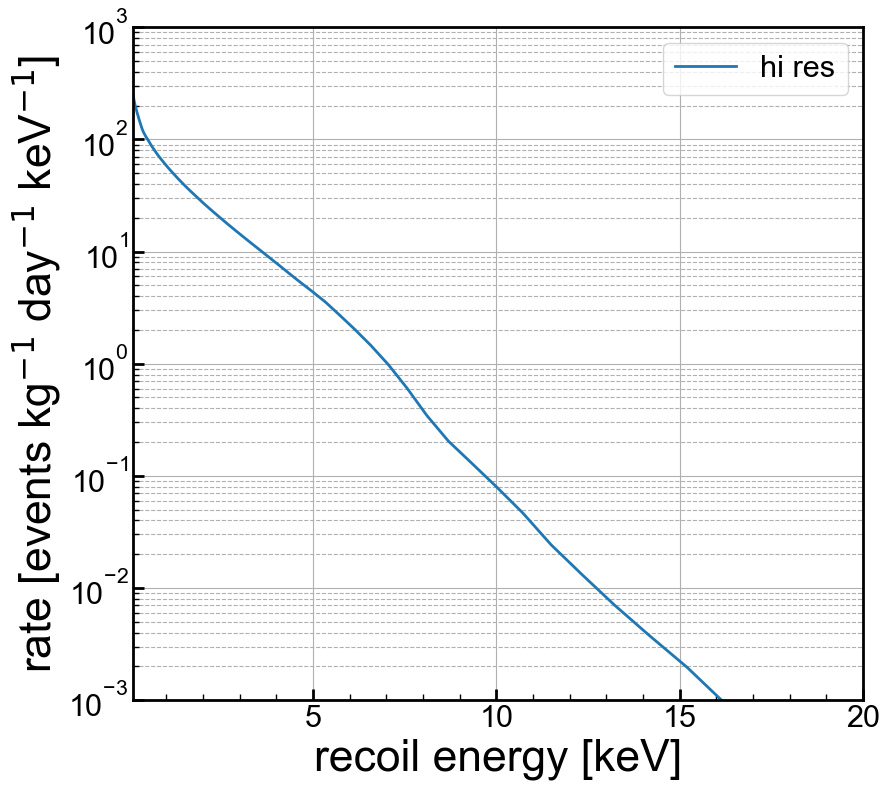

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er*1000, drde,label="hi res")



ymin = 1e-3
ymax = 1e3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 20) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ne-recspec-Eee.png')
plt.show()

Plot Interpretation
-
Our x-axis depicts electron recoil energies in keV, and our y-axis depicts our differential recoil rate at said electron recoil energies. As we can see, the recoil rate is much higher at lower recoil energies. In other words, the majority of neutron-electron scattering occurs at lower energies due to the relatively high flux of lower-energy incident neutrons and the inability of neutrons to transfer large amounts of energy to electrons, a result of the large difference in the two particles' masses. This suggests that our particle detectors will pick up a considerable amount of background signal from these events, and that these background signals must be properly identified so as not to be mistaken for rare event detections.

Converting to keV$_{\mathrm{nr}}$
---------------------------------

In [15]:
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
#ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [16]:
print(ylindv([10,10000]))

[0.11498363 0.30822517]
